In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from scipy import signal

In [8]:
(X,y,position) = torch.load('/work1/s174505/Thesis/Data/Real_data.pt')
position = position.numpy()
labels_y = [
    # 'Scartamento [mm]', 'ScartMedio [mm]', 'Curvatura [1/m]', 'Sopraelev. [mm]', 'VarSopraelev. [mm]', 'ScartStdDev [mm]', 
    # 'ScartLivTrasv [mm]', 'LivTrasvStdDev [mm]', 'Sghembo3m [°/oo]', 'Sghembo9m [°/oo]', 
    'LivLongSxD1 [mm]', 'LivLongDxD1 [mm]', 'AllinSxD1 [mm]', 'AllinDxD1 [mm]', # 'AllinStdDev [mm]', 'LivLongStdDev [mm]', 
    'LivLongSxD2 [mm]', 'LivLongDxD2 [mm]', 'AllinSxD2 [mm]', 'AllinDxD2 [mm]', 
    'LivLongSxD3 [mm]', 'LivLongDxD3 [mm]', 'AllinSxD3 [mm]', 'AllinDxD3 [mm]'
]

labels_X = [
    "Velocità [km/h]", "AccB1Y [m/s^2]", "AccB1Z [m/s^2]", "AccCR1Y [m/s^2]", "AccCR1Z [m/s^2]", "AccB2Y [m/s^2]", "AccB2Z [m/s^2]", # 0-6
    "AccCR2Y [m/s^2]", "AccCR2Z [m/s^2]", "AccB3Y [m/s^2]", "AccB3Z [m/s^2]", "AccCR3Y [m/s^2]", "AccCR3Z [m/s^2]", "AccB4Y [m/s^2]", # 7-13
    "AccB4Z [m/s^2]", "AccCR4Y [m/s^2]", "AccCR4Z [m/s^2]", "AccB5Y [m/s^2]", "AccB5Z [m/s^2]", "AccCR5Y [m/s^2]", "AccCR5Z [m/s^2]", # 14-20
    "AccB6Y [m/s^2]", "AccB6Z [m/s^2]", "AccCR6Y [m/s^2]", "AccCR6Z [m/s^2]", "AccB7Y [m/s^2]", "AccB7Z [m/s^2]", "AccCR7Y [m/s^2]", # 21-27
    "AccCR7Z [m/s^2]", "AccB8Y [m/s^2]", "AccB8Z [m/s^2]", "AccCR8Y [m/s^2]", "AccCR8Z [m/s^2]", # 28-32
    "AccCSAY [m/s^2]", "AccCSAZ [m/s^2]", "AccCSBY [m/s^2]", "AccCSBZ [m/s^2]", # 33-36
    # "AccCR1YS [m/s^2]", "AccCR1Yf0 [m/s^2]", "AccCR2YS [m/s^2]", "AccCR2Yf0 [m/s^2]", "AccCR3YS [m/s^2]", # 37-41
    # "AccCR3Yf0 [m/s^2]", "AccCR4YS [m/s^2]", "AccCR4Yf0 [m/s^2]", "AccCR5YS [m/s^2]", "AccCR5Yf0 [m/s^2]", "AccCR6YS [m/s^2]", "AccCR6Yf0 [m/s^2]", # 42-48
    # "AccCR7YS [m/s^2]", "AccCR7Yf0 [m/s^2]", "AccCR8YS [m/s^2]", "AccCR8Yf0 [m/s^2]", # 49-52
    # "AccCSAYS [m/s^2]", "AccCSAYQ [m/s^2]", "AccCSAYf [m/s^2]", # 43-55
    # "AccCSAZS [m/s^2]", "AccCSAZQ [m/s^2]", "AccCSBYS [m/s^2]", "AccCSBYQ [m/s^2]", "AccCSBYf [m/s^2]", "AccCSBZS [m/s^2]", "AccCSBZQ [m/s^2]", # 56-62
    # "AccCSAZ_Wz [m/s^2]", "AccCSBZ_Wz [m/s^2]", # 63-64
    "Curvatura [1/m]" # 65
]
misc = [0]
axel_boxes_Y = [1, 5, 9, 13, 17, 21, 25, 29]
axel_boxes_Z = [2, 6, 10, 14, 18, 22, 26, 30]
bogie_Y = [3, 7, 11, 15, 19, 23, 27, 31]
bogie_Z = [4, 8, 12, 16, 20, 24, 28, 32]
carbody_Y = [33, 35]
carbody_Z = [34, 36]

bogie_Y_S = [37, 39, 41, 43, 45, 47, 49, 51]
bogie_Y_f0 = [38, 40, 42, 44, 46, 48, 50, 52]
carbody_Y_S = [53, 58]
carbody_Y_Q = [54, 59]
carbody_Y_f = [55, 60]
carbody_Z_S = [56, 61]
carbody_Z_Q = [57, 62]
carbody_Z_Wz = [63, 64]

fs=2

In [9]:
df_y = pd.DataFrame(y, columns=labels_y)
df_X = pd.DataFrame(X, columns=labels_X)

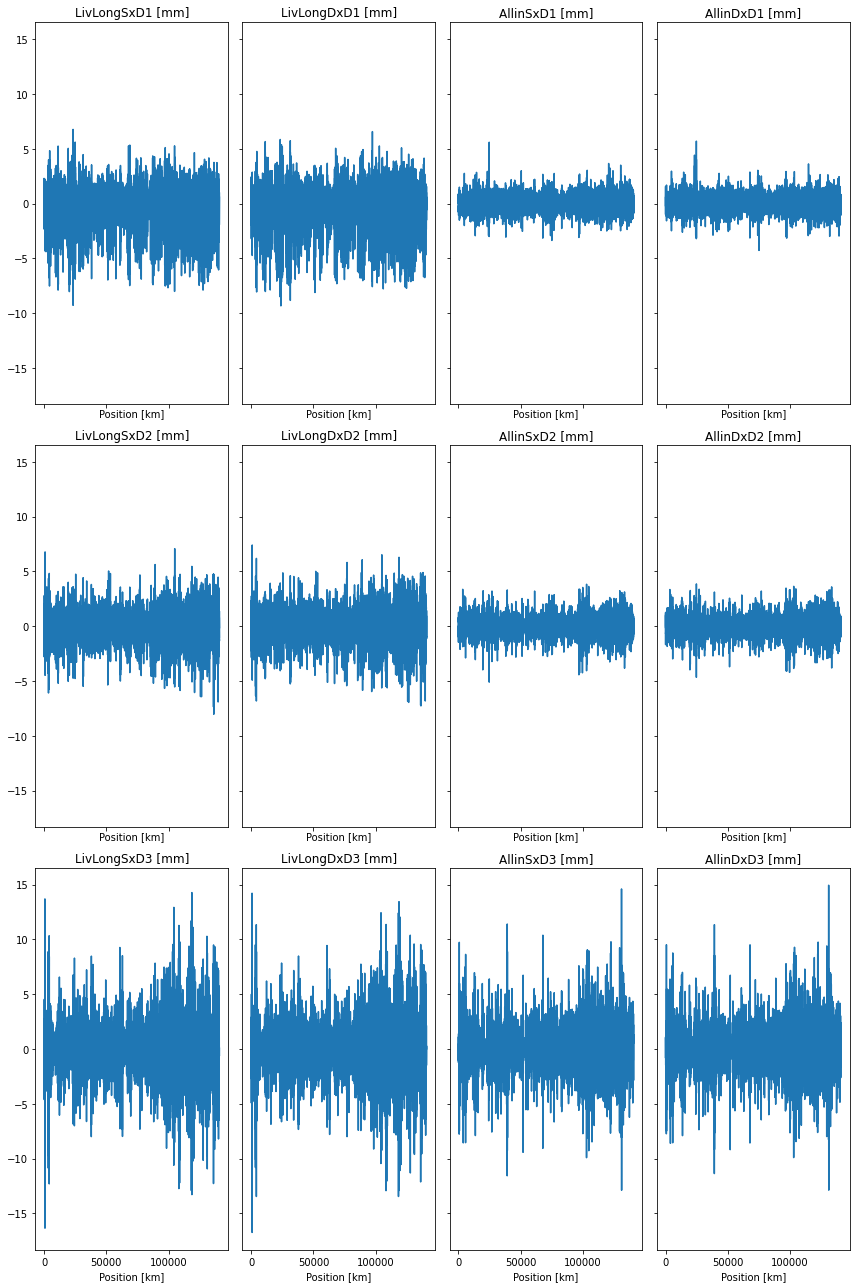

In [10]:
fig, axes = plt.subplots(3,4,figsize=(12,18), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    
    # if i > 1: 
    #    break
    ax.plot(position, y[:, i])
    ax.set_title(labels_y[i])
    ax.set_xlabel('Position [km]')

fig.tight_layout()
fig.savefig('plots/y plots.pdf',format='pdf')

Km                  : NA
Velocità[km/h]      : NA
SSCount [n.]        : NA
Scartamento [mm]    : 1
ScartMedio [mm]     : 2
Curvatura [1/m]     : 3
Sopraelev. [mm]     : 4
VarSopraelev. [mm]  : 5
ScartStdDev [mm]    : 6
Dif.Sopraelev. [mm] : NA
ScartLivTrasv [mm]  : 7
LivTrasvStdDev [mm] : 8
Sghembo3m [°/oo]    : 9
Sghembo9m [°/oo]    : 10
LivLongSxD1 [mm]    : 11
LivLongDxD1 [mm]    : 12
AllinSxD1 [mm]      : 13
AllinDxD1 [mm]      : 14
LivLongSx10m [mm]   : NA
LivLongDx10m [mm]   : NA
AllinSx10m [mm]     : NA
AllinDx10m [mm]     : NA
AllinSxPkPk [mm]    : NA
AllinDxPkPk [mm]    : 15
AllinStdDev [mm]    : 16
LivLongStdDev [mm]  : 17
LivLongSxD2 [mm]    : 18
LivLongDxD2 [mm]    : 19
AllinSxD2 [mm]      : 20
AllinDxD2 [mm]      : 21
LivLongSxD3 [mm]    : 22
LivLongDxD3 [mm]    : 23
AllinSxD3 [mm]      : 24
AllinDxD3 [mm]      : 25

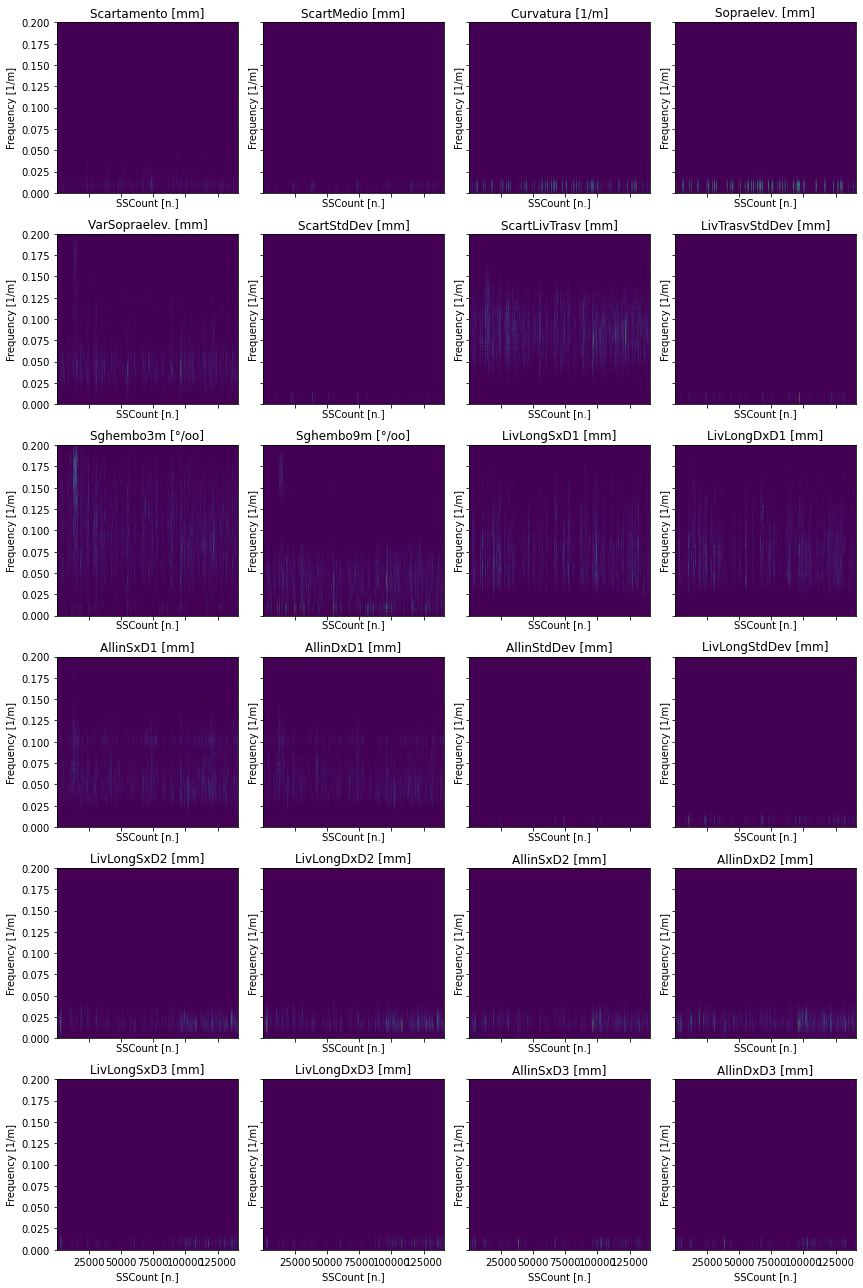

In [6]:
fig, axes = plt.subplots(6,4,figsize=(12,18), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    f, t, Sxx = signal.spectrogram(y[:, i], fs)

    ax.pcolormesh(t, f, Sxx, shading='gouraud')
    ax.set_ylabel('Frequency [1/m]')
    ax.set_xlabel('SSCount [n.]')
    ax.set_title(labels_y[i])
    ax.set_ylim([0, 0.2])
fig.tight_layout()

fig.savefig('plots/y spectograms.png',format='png',dpi=200)


/zhome/02/e/127482/.local/lib/python3.9/site-packages/matplotlib/patches.py:1111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


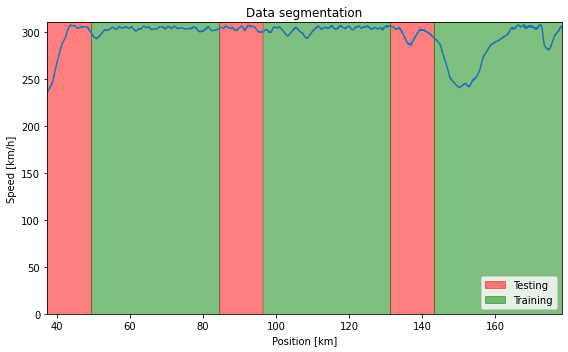

In [7]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(position, X[:,0])
ax.set_ylim([0,310])
ax.set_xlim([position[0], position[-1]])
ax.set_ylabel('Speed [km/h]')
ax.set_xlabel('Position [km]')

ax.axvspan(position[1-1], position[23827-1], alpha=0.5, color='red', label='Testing')
ax.axvspan(position[94000-1], position[117827-1], alpha=0.5, color='red')
ax.axvspan(position[188000-1], position[211827-1], alpha=0.5, color='red')
ax.axvspan(position[24000-1], position[94000-1], alpha=0.5, color='green', label='Training')
ax.axvspan(position[118000-1], position[188000-1], alpha=0.5, color='green')
ax.axvspan(position[211827-1], position[281827-1], alpha=0.5, color='green')

ax.legend()

ax.set_title('Data segmentation')

fig.tight_layout()

fig.savefig('plots/Data segmentation.pdf', format='pdf')

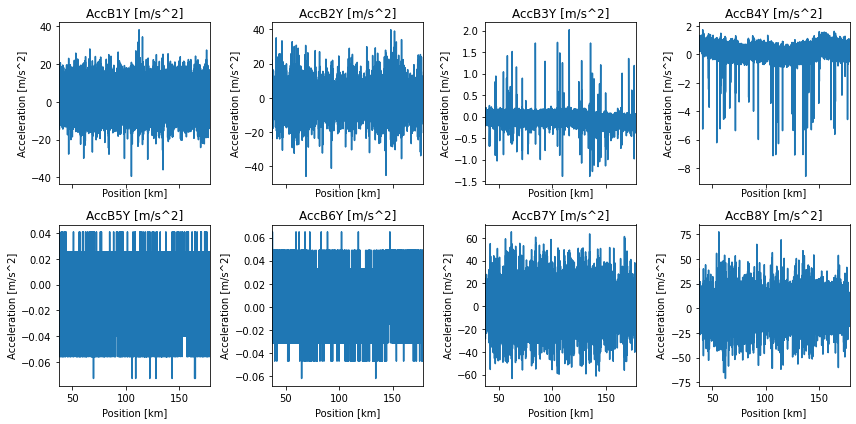

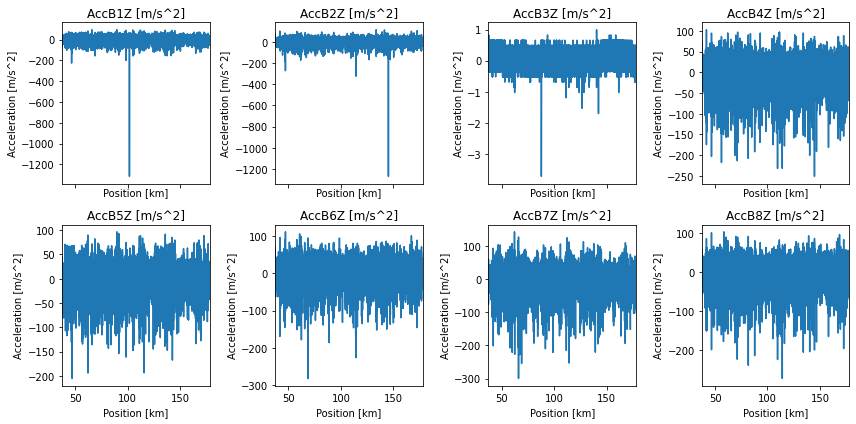

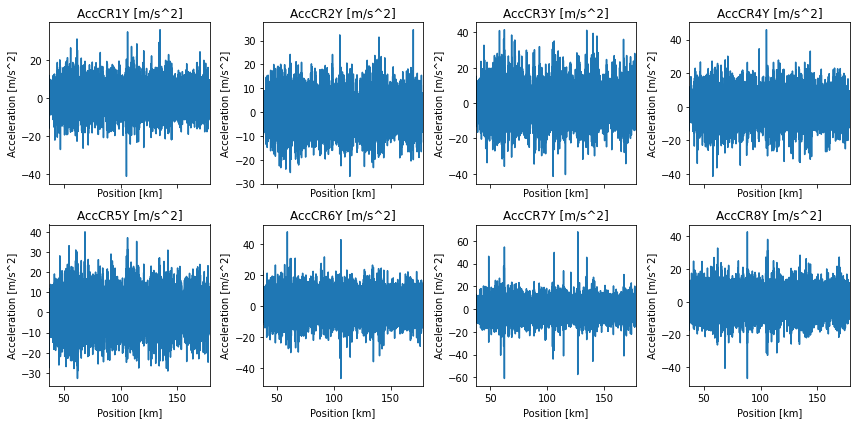

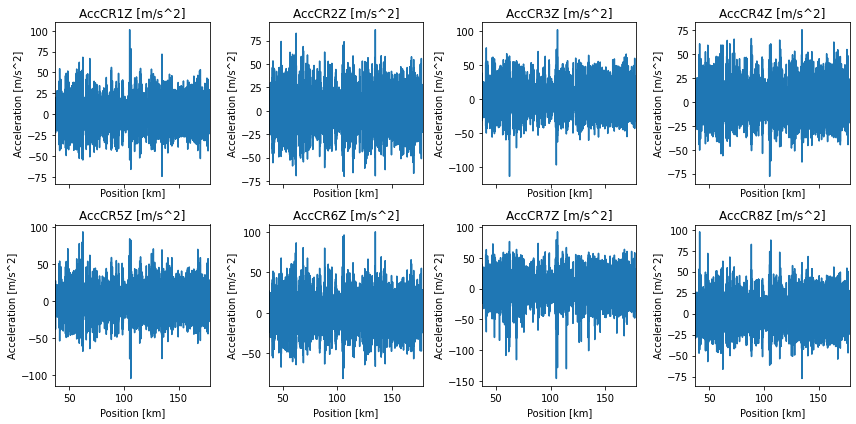

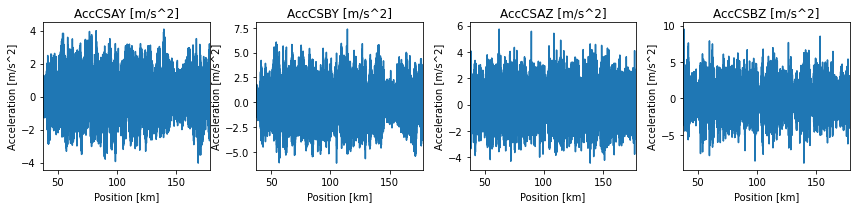

In [5]:
#misc = [0]
#axel_boxes_Y = [1, 5, 9, 13, 17, 21, 25, 29]
#axel_boxes_Z = [2, 6, 10, 14, 18, 22, 26, 30]
#bogie_Y = [3, 7, 11, 15, 19, 23, 27, 31]
#bogie_Z = [4, 8, 12, 16, 20, 24, 28, 32]
#carbody_Y = [33, 35]
#carbody_Z = [34, 36]

#bogie_Y_S = [37, 39, 41, 43, 45, 47, 49, 51]
#bogie_Y_f0 = [38, 40, 42, 44, 46, 48, 50, 52]
#carbody_Y_S = [53, 58]
#carbody_Y_Q = [54, 59]
#carbody_Y_f = [55, 60]
#carbody_Z_S = [56, 61]
#carbody_Z_Q = [57, 62]
#carbody_Z_Wz = [63, 64]

fig, axes = plt.subplots(2,4,figsize=(12,6), sharex=True)
for i,ax in zip(axel_boxes_Y, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Acceleration [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Axel boxes acc. in Y dimension.pdf',format='pdf')

fig, axes = plt.subplots(2,4,figsize=(12,6), sharex=True)
for i,ax in zip(axel_boxes_Z, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Acceleration [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Axel boxes acc. in Z dimension.pdf',format='pdf')

fig, axes = plt.subplots(2,4,figsize=(12,6), sharex=True)
for i,ax in zip(bogie_Y, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Acceleration [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Bogie acc. in Y dimension.pdf',format='pdf')

fig, axes = plt.subplots(2,4,figsize=(12,6), sharex=True)
for i,ax in zip(bogie_Z, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Acceleration [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Bogie acc. in Z dimension.pdf',format='pdf')

fig, axes = plt.subplots(1,4,figsize=(12,3), sharex=True)
for i,ax in zip(carbody_Y + carbody_Z, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Acceleration [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Carbody acc. in Y-Z dimension.pdf',format='pdf')

# fig, axes = plt.subplots(1,2,figsize=(6,3), sharex=True)
# for i,ax in zip(carbody_Z, axes.flatten()):
#     ax.plot(position, X[:, i])
#     ax.set_xlabel('Position [km]')
#     ax.set_xlim([position[0], position[-1]])
#     ax.set_ylabel('Acceleration [m/s^2]')
#     ax.set_title(labels_X[i])
# fig.tight_layout()
# fig.savefig('Carbody acc. in Z dimension.pdf',format='pdf')

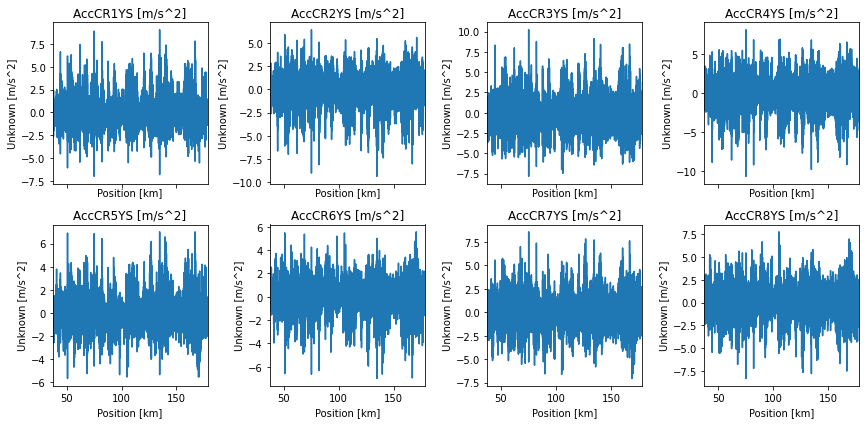

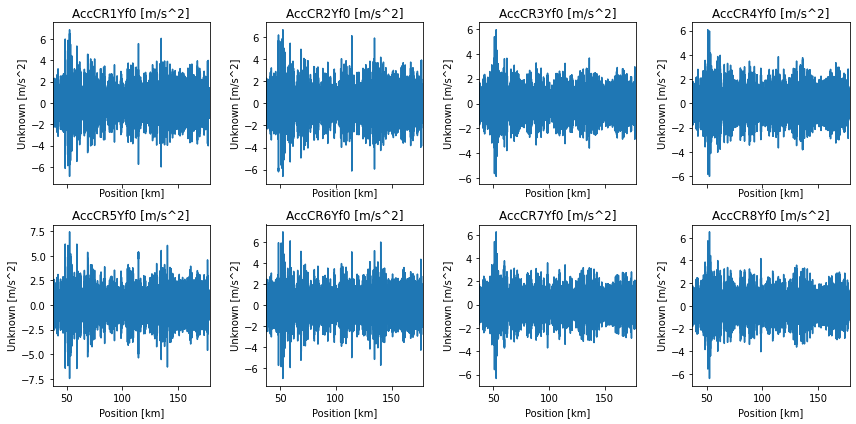

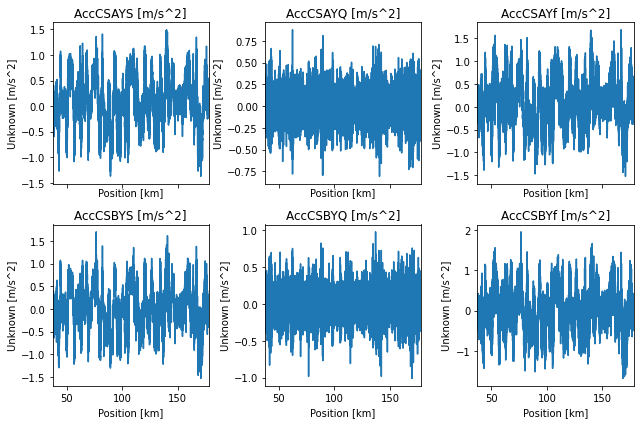

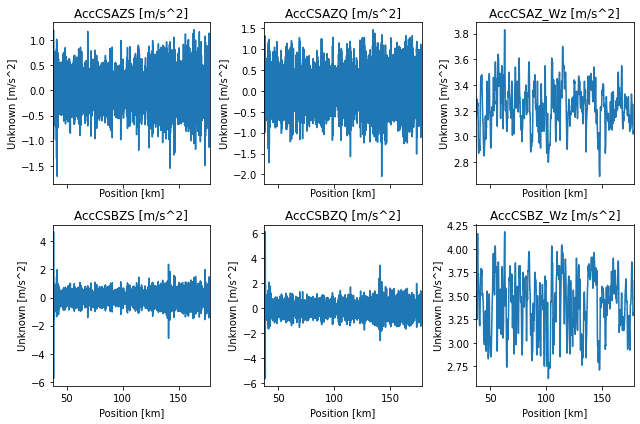

In [11]:
#bogie_Y_S = [37, 39, 41, 43, 45, 47, 49, 51]
#bogie_Y_f0 = [38, 40, 42, 44, 46, 48, 50, 52]
#carbody_Y_S = [53, 58]
#carbody_Y_Q = [54, 59]
#carbody_Y_f = [55, 60]
#carbody_Z_S = [56, 61]
#carbody_Z_Q = [57, 62]
#carbody_Z_Wz = [63, 64]

fig, axes = plt.subplots(2,4,figsize=(12,6), sharex=True)
for i,ax in zip(bogie_Y_S, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Unknown [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Bogie acc. S in Y dimension.pdf',format='pdf')

fig, axes = plt.subplots(2,4,figsize=(12,6), sharex=True)
for i,ax in zip(bogie_Y_f0, axes.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Unknown [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Bogie acc. f0 in Y dimension.pdf',format='pdf')

fig, axes = plt.subplots(2,3,figsize=(9,6), sharex=True)
for i,ax in zip(carbody_Y_S + carbody_Y_Q + carbody_Y_f, axes.T.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Unknown [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Carbody acc. S+Q+f in Y dimension.pdf',format='pdf')

fig, axes = plt.subplots(2,3,figsize=(9,6), sharex=True)
for i,ax in zip(carbody_Z_S + carbody_Z_Q + carbody_Z_Wz, axes.T.flatten()):
    ax.plot(position, X[:, i])
    ax.set_xlabel('Position [km]')
    ax.set_xlim([position[0], position[-1]])
    ax.set_ylabel('Unknown [m/s^2]')
    ax.set_title(labels_X[i])
fig.tight_layout()
fig.savefig('plots/Carbody acc. S+Q+Wz in Z dimension.pdf',format='pdf')
